# Solução desafio Kaggle time series

## UFRJ Analytica

### Membros

<ul>
<li>André Luiz Rosário </li>
<li> Leonardo Emerson </li>
</ul>

<p>importando bibliotecas</p>

In [1]:
import warnings
warnings.simplefilter('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import numpy as np

<p> Analisando datasets </p>

In [2]:
holidays_events = pd.read_csv('./datasets/holidays_events.csv')
holidays_events.head()

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [3]:
oil = pd.read_csv('./datasets/oil.csv')
oil.head()

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


In [4]:
sample_submission = pd.read_csv('./datasets/sample_submission.csv')
sample_submission.head()

,id,sales
0,3000888,0.0
1,3000889,0.0
2,3000890,0.0
3,3000891,0.0
4,3000892,0.0


In [5]:
stores = pd.read_csv('./datasets/stores.csv')
stores.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [6]:
test = pd.read_csv('./datasets/test.csv')
test.head()

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0


In [7]:
train = pd.read_csv('./datasets/train.csv')
train.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [8]:
transactions = pd.read_csv('./datasets/transactions.csv')
transactions.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [9]:
# Tamanho dos datasets
print("Dimensão holidays_events: ", holidays_events.shape)
print("Dimensão oil: ", oil.shape)
print("Dimensão stores: ", stores.shape)
print("Dimensão test: ", test.shape)
print("Dimensão train: ", train.shape)
print("Dimensão transactions: ", transactions.shape)

Dimensão holidays_events:  (350, 6)
Dimensão oil:  (1218, 2)
Dimensão stores:  (54, 5)
Dimensão test:  (28512, 5)
Dimensão train:  (3000888, 6)
Dimensão transactions:  (83488, 3)


In [10]:
# Info dos datasets
print("###### holidays_events ######\n")
print(holidays_events.info(), "\n\n")
print("###### oil ######\n")
print(oil.info(), "\n\n")
print("###### stores ######\n")
print(stores.info(), "\n\n")
print("###### test ######\n")
print(test.info(), "\n\n")
print("###### train ######\n")
print(train.info(), "\n\n")
print("###### transactions ######\n")
print(transactions.info())

###### holidays_events ######

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         350 non-null    object
 1   type         350 non-null    object
 2   locale       350 non-null    object
 3   locale_name  350 non-null    object
 4   description  350 non-null    object
 5   transferred  350 non-null    bool  
dtypes: bool(1), object(5)
memory usage: 14.1+ KB
None 


###### oil ######

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        1218 non-null   object 
 1   dcoilwtico  1175 non-null   float64
dtypes: float64(1), object(1)
memory usage: 19.2+ KB
None 


###### stores ######

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   

In [9]:
#Preenchendo NaN no dataset oil pela média:
oil['dcoilwtico'] = oil['dcoilwtico'].fillna((oil['dcoilwtico'].mean()))
oil['dcoilwtico']

0       67.714366
1       93.140000
2       92.970000
3       93.120000
4       93.200000
          ...    
1213    47.650000
1214    46.400000
1215    46.460000
1216    45.960000
1217    47.260000
Name: dcoilwtico, Length: 1218, dtype: float64

In [10]:
#CONVERSÕES DATASET TRAIN
train['date'] = train['date'].astype('datetime64')
train["mes_date"] = train['date'].dt.month
train['ano_date'] = train['date'].dt.year
train["dia_date"] = train['date'].dt.day
train['anomes'] = train['date'].dt.to_period('m')
train['anomes'] = train['anomes'].astype(str).str.replace('-', '')

#CONVERSÕES DATASET OIL
oil['date'] = oil['date'].astype('datetime64')
oil['dia_semana'] = oil['date'].dt.dayofweek
oil = oil.set_index('date')

#CONVERSÕES DATASET HOLIDAYS_EVENTS
holidays_events['date'] = holidays_events['date'].astype('datetime64')

###### Plotando quantidade de lojas por tipo de loja

Text(0, 0.5, 'Quantidade')

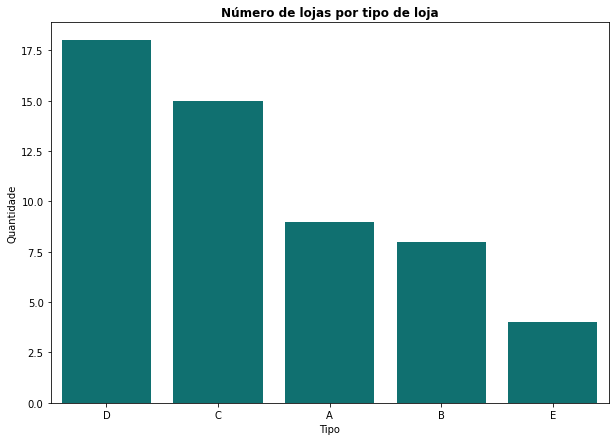

In [14]:
plt.figure(figsize=(10, 7))
sns.countplot(data=stores, x='type', order=stores.type.value_counts().index, color='teal')

plt.title('Número de lojas por tipo de loja',fontweight="bold")
plt.xlabel('Tipo')
plt.ylabel('Quantidade')

Text(0.5, 0, 'Quantidade')

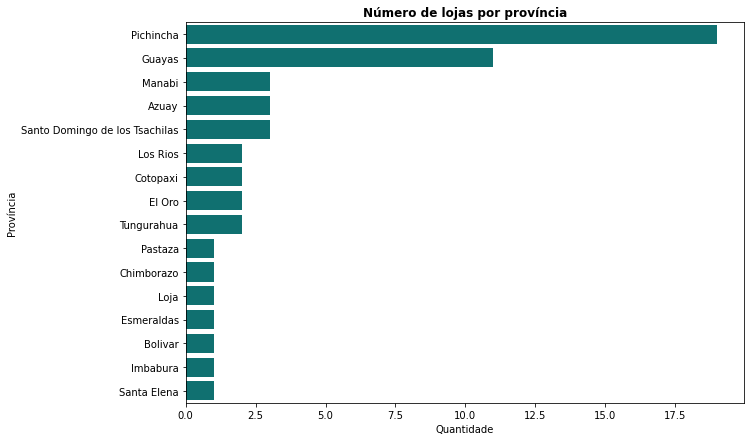

In [15]:
plt.figure(figsize=(10, 7))
sns.countplot(data=stores, y='state',order=stores.state.value_counts().index, color='teal')

plt.title('Número de lojas por província',fontweight="bold")
plt.ylabel('Província')
plt.xlabel('Quantidade')

In [11]:
#tirando coluna description

holidays_events.drop('description', axis = 1, inplace = True)

# tirando as linhas nas quais a coluna 'transferred' == True, ja que
#o feriado nao foi naquela data
for idx, val in holidays_events['transferred'].items():
    if val == True:
        holidays_events.drop(axis = 0, index = idx, inplace = True)

In [12]:
#mapeando clusters do dataset 

dict_cluster = {}
for idx, val in stores['store_nbr'].items():
    dict_cluster[str(val)] = stores.iloc[idx]['cluster']

### Aplicando modelos

<p> Inicialmente, foram escolhidos, para uma primeira análise, os modelos Random Forest e Redes Neurais, com o objetivo de comparar o desempenho e o resultado dos mesmos. Para isso, será utilizada a biblioteca sklearn</p>

<p> Preparando dataset </p>

In [13]:
# modelo nao aceita string como parâmetro.
# -> Solução: Mapear cada valor de 'family' para float/string usando label encoder
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

train['train_encoded'] = label_encoder.fit_transform(train['family'])
#train.head()

In [14]:
#mapeando clusters:
def map_cluster(linha):
    return dict_cluster[str(linha['store_nbr'])]

train['cluster'] = train.apply(lambda row: map_cluster(row), axis = 1)

In [15]:
# mapeando feriados

lista_feriados = holidays_events['date'].unique()

def map_hollidays(linha):
    if linha['date'] in lista_feriados:
        return 1
    else:
        return 0

train['holliday'] = train.apply(lambda row: map_hollidays(row), axis = 1)

In [16]:
from sklearn.preprocessing import MinMaxScaler

In [17]:
minmax_scaler = MinMaxScaler()

data_oil = oil['dcoilwtico'].values.reshape(-1,1)
minmax_scaler.fit(data_oil)

MinMaxScaler()

In [18]:
oil['preco'] = minmax_scaler.transform(data_oil)

In [19]:
oil.head()

,dcoilwtico,dia_semana,preco
date,,,
2013-01-01,67.714366,1,0.491820
2013-01-02,93.140000,2,0.792965
2013-01-03,92.970000,3,0.790951
2013-01-04,93.120000,4,0.792728
2013-01-07,93.200000,0,0.793675


In [19]:
# mapeando preco oleo

lista_datas = oil.index.values

def map_oilprice(linha):
    if linha['date'] in lista_datas:
        #return oil[oil['date'] == linha['date']]['dcoilwtico']
        #print('ok')
        return oil.loc[linha['date']]['preco']
    else:
        #print('ok')
        return oil['preco'].mean()

train['dcoilwtico'] = train.apply(lambda row: map_oilprice(row), axis = 1)

In [22]:
train.head()

,id,date,store_nbr,family,sales,onpromotion,mes_date,ano_date,dia_date,anomes,train_encoded,cluster,holliday,dcoilwtico
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,1,2013,1,201301,0,13,1,0.49182
1,1,2013-01-01,1,BABY CARE,0.0,0,1,2013,1,201301,1,13,1,0.49182
2,2,2013-01-01,1,BEAUTY,0.0,0,1,2013,1,201301,2,13,1,0.49182
3,3,2013-01-01,1,BEVERAGES,0.0,0,1,2013,1,201301,3,13,1,0.49182
4,4,2013-01-01,1,BOOKS,0.0,0,1,2013,1,201301,4,13,1,0.49182


In [24]:
#random forest
from sklearn.ensemble import RandomForestRegressor

In [20]:
#dividindo em dados de treino e teste:
from sklearn.model_selection import train_test_split

In [21]:
X = train.drop(['sales', 'family','id', 'mes_date', 'ano_date', 'dia_date', 'anomes'], axis = 1)
y = train['sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = None, shuffle = False)

In [22]:
X_train.head()

,date,store_nbr,onpromotion,train_encoded,cluster,holliday,dcoilwtico
0,2013-01-01,1,0,0,13,1,0.49182
1,2013-01-01,1,0,1,13,1,0.49182
2,2013-01-01,1,0,2,13,1,0.49182
3,2013-01-01,1,0,3,13,1,0.49182
4,2013-01-01,1,0,4,13,1,0.49182


In [27]:
rf = RandomForestRegressor(n_estimators = 15)

In [28]:
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=15)

In [29]:
X_test['sales'] = rf.predict(X_test)

In [30]:
X_test['sales'].head()

2100621      45.466667
2100622    1474.866667
2100623    1942.466667
2100624     404.744533
2100625     474.266667
Name: sales, dtype: float64

In [31]:
train.loc[2100621:2100625]['sales']

2100621      32.000
2100622    1977.000
2100623    3036.000
2100624     519.661
2100625     583.000
Name: sales, dtype: float64

<p> Testando RNN </p>

In [23]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras import Sequential
from keras import optimizers

In [24]:
X_train = X_train.set_index('date')

In [25]:
data_X_train = X_train.values
data_y_train = y_train.values

In [26]:
data_X_train = np.reshape(data_X_train, (data_X_train.shape[0],data_X_train.shape[1],1))
print(data_X_train.shape)
print(data_y_train.shape)

(2100621, 6, 1)
(2100621,)


In [27]:
data_X_train = np.asarray(data_X_train).astype('int')

In [28]:
model = Sequential()
model.add(LSTM(units = 100, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(LSTM(units = 50))
model.add(Dense(1))

In [29]:
opt = keras.optimizers.RMSprop(lr=0.0001)

In [30]:
model.compile(loss='mean_squared_logarithmic_error', optimizer=opt)

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 6, 100)            40800     
_________________________________________________________________
lstm_1 (LSTM)                (None, 50)                30200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 71,051
Trainable params: 71,051
Non-trainable params: 0
_________________________________________________________________


In [32]:
#ta demorando muito
model.fit(data_X_train, data_y_train, epochs=10, batch_size=64, verbose=2)

Epoch 1/10
32823/32823 - 310s - loss: 14.5281
Epoch 2/10
32823/32823 - 281s - loss: 14.5281
Epoch 3/10
32823/32823 - 299s - loss: 14.5281
Epoch 4/10
32823/32823 - 277s - loss: 14.5282
Epoch 5/10
32823/32823 - 266s - loss: 14.5282
Epoch 6/10
32823/32823 - 269s - loss: 14.5282
Epoch 7/10
32823/32823 - 267s - loss: 14.5281
Epoch 8/10
32823/32823 - 261s - loss: 14.5281
Epoch 9/10
32823/32823 - 263s - loss: 14.5282
Epoch 10/10
32823/32823 - 261s - loss: 14.5282


In [33]:
X_test.set

,date,store_nbr,onpromotion,train_encoded,cluster,holliday,dcoilwtico
2100621,2016-03-27,49,0,6,11,0,0.49182
2100622,2016-03-27,49,26,7,11,0,0.49182
2100623,2016-03-27,49,0,8,11,0,0.49182
2100624,2016-03-27,49,0,9,11,0,0.49182
2100625,2016-03-27,49,0,10,11,0,0.49182


In [36]:
X_test = X_test.set_index('date')

In [38]:
test_X = X_test.values

test_X = np.reshape(test_X, (test_X.shape[0],test_X.shape[1],1))
print(test_X.shape)

(900267, 6, 1)


In [40]:
X_test['sales'] = model.predict(test_X)

In [41]:
X_test['sales'].head()

date
2016-03-27   -0.304173
2016-03-27   -0.398113
2016-03-27   -0.316359
2016-03-27   -0.320472
2016-03-27   -0.323483
Name: sales, dtype: float32

In [42]:
y_test.head()

2100621      32.000
2100622    1977.000
2100623    3036.000
2100624     519.661
2100625     583.000
Name: sales, dtype: float64

### Fazendo predições

In [23]:
test.head()

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0


In [43]:
test['train_encoded'] = label_encoder.fit_transform(test['family'])

In [44]:
test['cluster'] = test.apply(lambda row: map_cluster(row), axis = 1)

In [45]:
test['holliday'] = test.apply(lambda row: map_hollidays(row), axis = 1)

In [46]:
test['dcoilwtico'] = test.apply(lambda row: map_oilprice(row), axis = 1)

In [47]:
test = test.set_index('date')
data_X = test.drop(['family','id'], axis = 1)
data_X = data_X.values

In [36]:
test.head()

,id,store_nbr,family,onpromotion,train_encoded,cluster,holliday,dcoilwtico
date,,,,,,,,
2017-08-16,3000888,1,AUTOMOTIVE,0,0,13,0,0.49182
2017-08-16,3000889,1,BABY CARE,0,1,13,0,0.49182
2017-08-16,3000890,1,BEAUTY,2,2,13,0,0.49182
2017-08-16,3000891,1,BEVERAGES,20,3,13,0,0.49182
2017-08-16,3000892,1,BOOKS,0,4,13,0,0.49182


In [48]:
data_X = np.reshape(data_X, (data_X.shape[0],data_X.shape[1],1))
print(data_X.shape)

(28512, 6, 1)


In [49]:
data_X = np.asarray(data_X).astype('int')

In [51]:
test['sales'] = model.predict(data_X)

In [52]:
test.head()

,id,store_nbr,family,onpromotion,train_encoded,cluster,holliday,dcoilwtico,sales
date,,,,,,,,,
2017-08-16,3000888,1,AUTOMOTIVE,0,0,13,0,0.49182,-0.146113
2017-08-16,3000889,1,BABY CARE,0,1,13,0,0.49182,-0.162617
2017-08-16,3000890,1,BEAUTY,2,2,13,0,0.49182,-0.208483
2017-08-16,3000891,1,BEVERAGES,20,3,13,0,0.49182,-0.301991
2017-08-16,3000892,1,BOOKS,0,4,13,0,0.49182,-0.203638


In [79]:
team_submission = test[['id','sales']].reset_index().drop('date',axis=1)

In [80]:
team_submission.reset_index().drop('date',axis=1,inplace=True)

KeyError: "['date'] not found in axis"

In [81]:
team_submission.head()

,id,sales
0,3000888,-0.146113
1,3000889,-0.162617
2,3000890,-0.208483
3,3000891,-0.301991
4,3000892,-0.203638


In [85]:
team_submission.to_csv('C:/Users/andre/Desktop/UFRJ/analytica/kaggle_timeseries/repo/kaggle-store-sales-time-series-forecasting/submissionfile.csv',index=False)

In [86]:
asd = pd.read_csv('./submissionfile.csv')

In [87]:
asd.head()

,id,sales
0,3000888,-0.146113
1,3000889,-0.162617
2,3000890,-0.208483
3,3000891,-0.301991
4,3000892,-0.203638


In [69]:
sample_submission.to_csv('')

,id,sales
0,3000888,0.0
1,3000889,0.0
2,3000890,0.0
3,3000891,0.0
4,3000892,0.0
